PART A

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as signal
import pandas as pd
import librosa
import librosa.display

audio_file = "exam-1.wav"
speech, sr = librosa.load(audio_file)




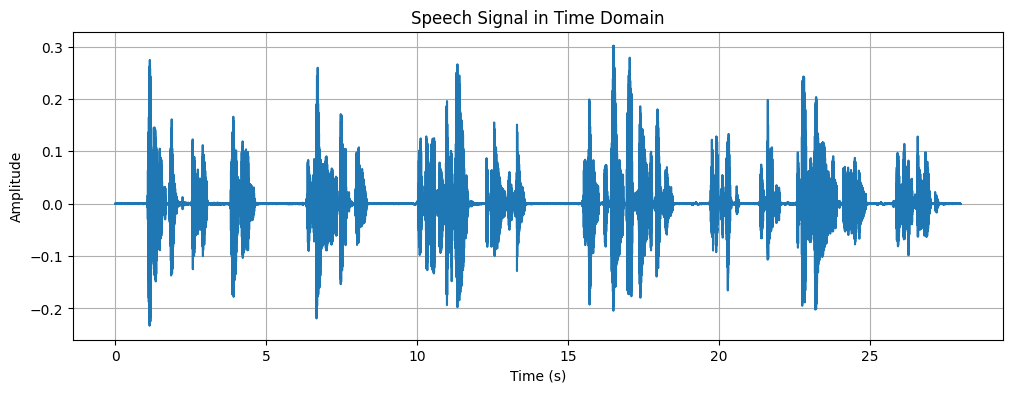

In [3]:
# speech signal analysis in time domain
#  plot speech in time domain
plt.figure(figsize=(12, 4))
plt.plot(np.linspace(0, len(speech) / sr, num=len(speech)), speech)
plt.title("Speech Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


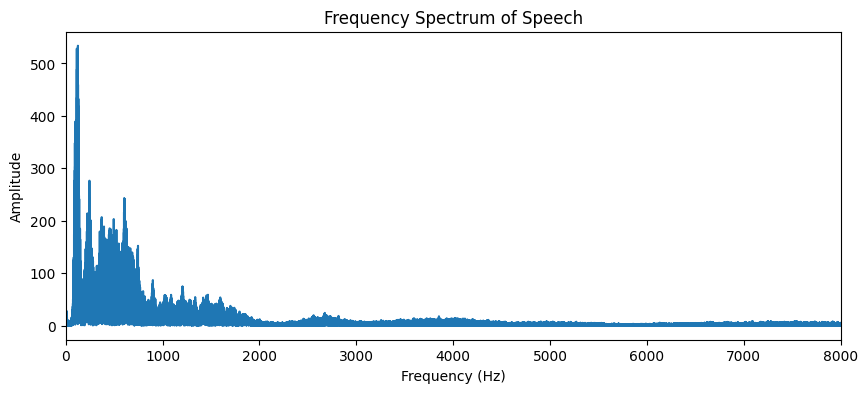

Significant frequency range: 4.89 Hz to 1794.72 Hz


In [4]:
# frequency range and resolution
from scipy.fft import fft, fftfreq

# Length of the signal
N = len(speech)

# Compute FFT
yf = np.abs(fft(speech))
xf = fftfreq(N, 1/sr)

# Take only positive frequencies
xf = xf[xf >= 0]
yf = yf[:len(xf)]

# Plot frequency spectrum
plt.figure(figsize=(10,4))
plt.plot(xf, yf)
plt.title("Frequency Spectrum of Speech")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0, 8000)  # speech mostly below 8kHz
plt.show()

# Optional: find the frequency range with significant energy
threshold = 0.05 * np.max(yf)  # 5% of max amplitude
significant_freqs = xf[yf > threshold]
f_min = significant_freqs.min()
f_max = significant_freqs.max()
print(f"Significant frequency range: {f_min:.2f} Hz to {f_max:.2f} Hz")



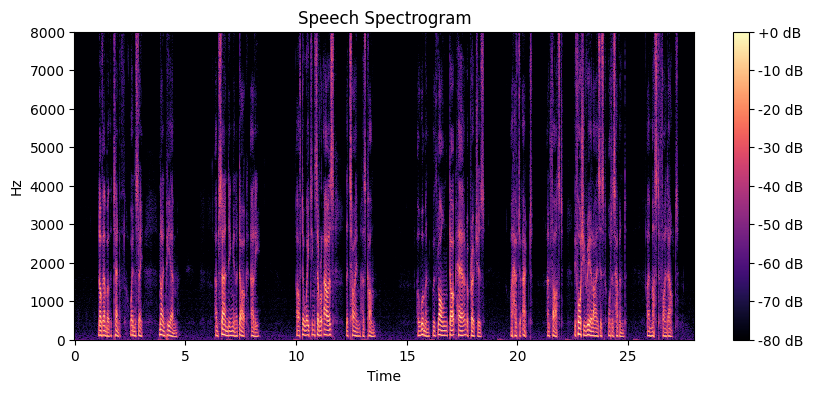

In [5]:
import librosa.display

plt.figure(figsize=(10, 4))
D = np.abs(librosa.stft(speech))
S_db = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title("Speech Spectrogram")
plt.ylim(0, 8000)  # focus on speech range
plt.show()


In [6]:
#  determine sampling rate 
print(f"Original Sampling Rate: {sr} Hz")
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Compute FFT
N = len(speech)
yf = np.abs(fft(speech))
xf = fftfreq(N, 1/sr)

# Find significant frequency band
energy_threshold = np.max(yf) * 0.05  # 5% energy threshold
useful_freqs = xf[yf > energy_threshold]
f_max = np.max(useful_freqs)

print(f"Max useful frequency: {f_max:.2f} Hz")
recommended_sr = 2 * f_max
print(f"Recommended Sampling Rate (Nyquist-based): {recommended_sr:.2f} Hz")


Original Sampling Rate: 22050 Hz
Max useful frequency: 1794.72 Hz
Recommended Sampling Rate (Nyquist-based): 3589.44 Hz


/tmp/ipykernel_2703/3714078967.py:62: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/kelvin/miniconda3/envs/speech_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


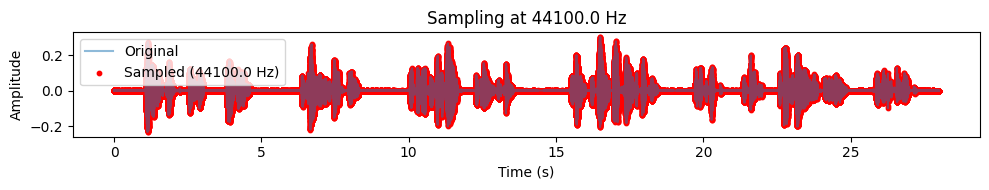

/tmp/ipykernel_2703/3714078967.py:76: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


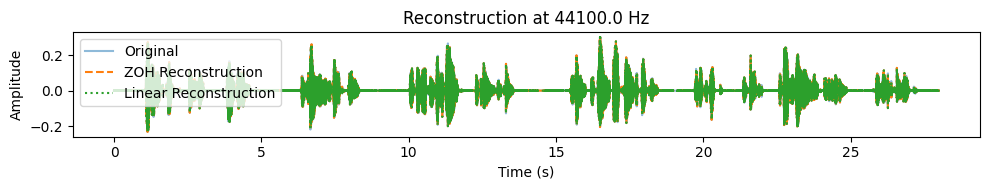

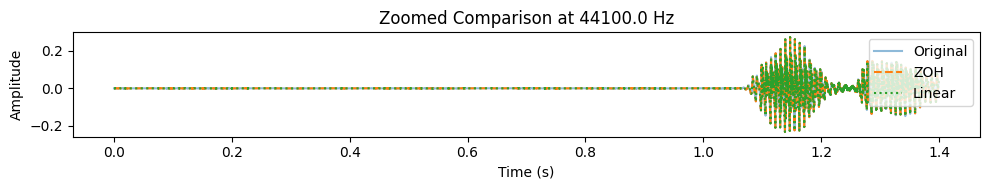

Sampling Rate: 44100.0 Hz
  MSE (ZOH): 4.68e-17, MSE (Linear): 4.68e-17
  MAE (ZOH): 5.37e-09, MAE (Linear): 5.37e-09
--------------------------------------------------


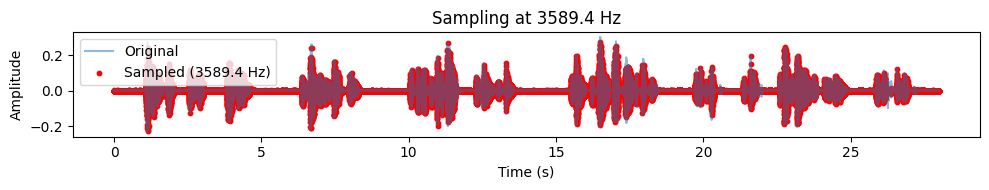

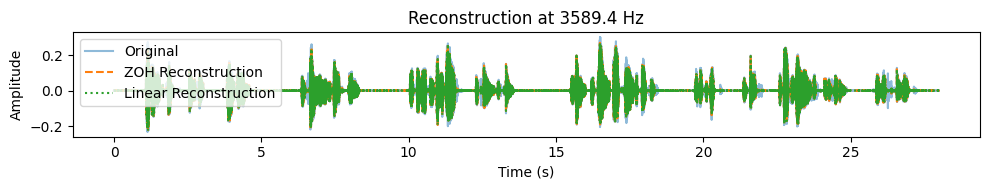

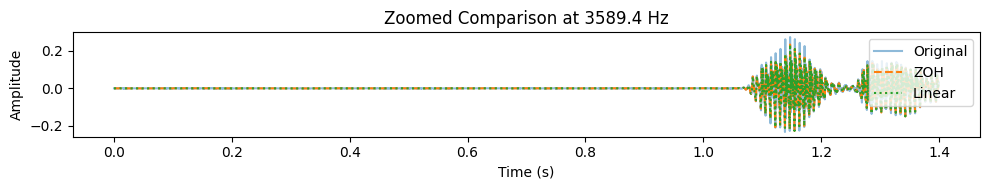

Sampling Rate: 3589.4 Hz
  MSE (ZOH): 2.57e-05, MSE (Linear): 2.57e-05
  MAE (ZOH): 1.89e-03, MAE (Linear): 1.89e-03
--------------------------------------------------


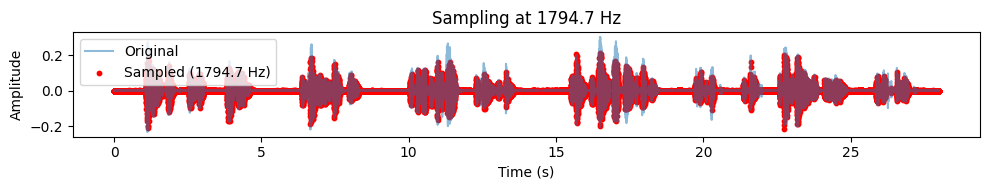

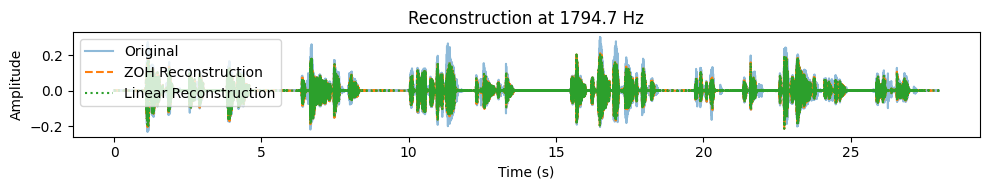

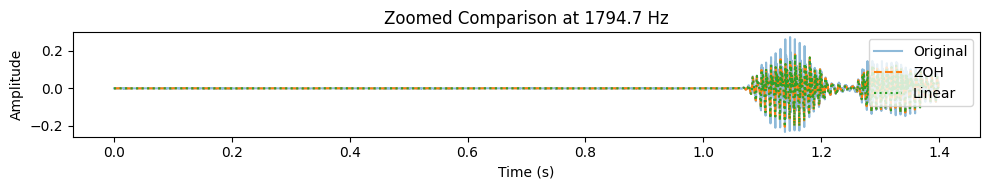

Sampling Rate: 1794.7 Hz
  MSE (ZOH): 1.01e-04, MSE (Linear): 1.01e-04
  MAE (ZOH): 3.67e-03, MAE (Linear): 3.67e-03
--------------------------------------------------
   Sampling Rate (Hz)     MSE (ZOH)  MSE (Linear)     MAE (ZOH)  MAE (Linear)
0        44100.000000  4.678273e-17  4.678273e-17  5.367267e-09  5.367267e-09
1         3589.441836  2.574352e-05  2.574352e-05  1.891100e-03  1.891100e-03
2         1794.720918  1.011008e-04  1.011008e-04  3.665264e-03  3.665264e-03


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import pandas as pd
import librosa

# Load audio
audio_file = "exam-1.wav"
speech, sr = librosa.load(audio_file, sr=None)

# Example: recommended_sr and f_max can be computed earlier
# Here we just assume some values for demonstration


sampling_rates = [sr, recommended_sr, f_max]
mse_results = []
duration = len(speech) / sr

for fs_s in sampling_rates:
    # Resample
    n_s = int(duration * fs_s)
    sampled = signal.resample(speech, n_s)
    t_s = np.linspace(0, duration, n_s, endpoint=False)

    # Reconstruction reference
    t_ref = np.linspace(0, duration, len(speech), endpoint=False)

    # -----------------------------
    # Reconstruction
    # -----------------------------
    # Zero-Order Hold (nearest neighbor)
    recon_zoh = np.interp(t_ref, t_s, sampled, left=sampled[0], right=sampled[-1])
    # Linear interpolation
    recon_linear = np.interp(t_ref, t_s, sampled)

    # -----------------------------
    # Compute MSE & MAE
    # -----------------------------
    mse_zoh = np.mean((speech - recon_zoh)**2)
    mse_linear = np.mean((speech - recon_linear)**2)
    mae_zoh = np.mean(np.abs(speech - recon_zoh))
    mae_linear = np.mean(np.abs(speech - recon_linear))

    mse_results.append({
        'Sampling Rate (Hz)': fs_s,
        'MSE (ZOH)': mse_zoh,
        'MSE (Linear)': mse_linear,
        'MAE (ZOH)': mae_zoh,
        'MAE (Linear)': mae_linear
    })

    # -----------------------------
    # Visualization: Sampling
    # -----------------------------
    plt.figure(figsize=(10, 2))
    plt.plot(np.linspace(0, duration, len(speech)), speech, label='Original', alpha=0.5)
    plt.scatter(t_s, sampled, color='red', s=10, label=f'Sampled ({fs_s:.1f} Hz)')
    plt.title(f"Sampling at {fs_s:.1f} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # -----------------------------
    # Visualization: Reconstruction
    # -----------------------------
    plt.figure(figsize=(10, 2))
    plt.plot(t_ref, speech, label='Original', alpha=0.5)
    plt.plot(t_ref, recon_zoh, label='ZOH Reconstruction', linestyle='--')
    plt.plot(t_ref, recon_linear, label='Linear Reconstruction', linestyle=':')
    plt.title(f"Reconstruction at {fs_s:.1f} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # -----------------------------
    # Visualization: Zoomed Comparison (first 5%)
    # -----------------------------
    zoom_idx = slice(0, int(0.05 * len(speech)))
    plt.figure(figsize=(10, 2))
    plt.plot(t_ref[zoom_idx], speech[zoom_idx], label='Original', alpha=0.5)
    plt.plot(t_ref[zoom_idx], recon_zoh[zoom_idx], label='ZOH', linestyle='--')
    plt.plot(t_ref[zoom_idx], recon_linear[zoom_idx], label='Linear', linestyle=':')
    plt.title(f"Zoomed Comparison at {fs_s:.1f} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print metrics
    print(f"Sampling Rate: {fs_s:.1f} Hz")
    print(f"  MSE (ZOH): {mse_zoh:.2e}, MSE (Linear): {mse_linear:.2e}")
    print(f"  MAE (ZOH): {mae_zoh:.2e}, MAE (Linear): {mae_linear:.2e}")
    print("-" * 50)

# -----------------------------
# Display MSE & MAE results
# -----------------------------
df = pd.DataFrame(mse_results)
print(df)


In [8]:
print(f"Recommended Sampling Rate (Nyquist-based): {recommended_sr:.2f} Hz")


Recommended Sampling Rate (Nyquist-based): 3589.44 Hz


PART B

In [9]:
import numpy as np
import librosa

def add_noise_snr(signal, snr_db):
    """
    Add Gaussian noise to a signal at a specific SNR (dB).
    snr_db >0 means signal stronger than noise
    """
    # Power of signal
    P_signal = np.mean(signal**2)
    
    # Compute required noise power
    P_noise = P_signal / (10**(snr_db / 10))
    
    # Generate Gaussian noise
    noise = np.random.randn(len(signal)) * np.sqrt(P_noise)
    
    noisy_signal = signal + noise
    return noisy_signal

# Example: 20 dB SNR
noisy_speech = add_noise_snr(speech, snr_db=20)


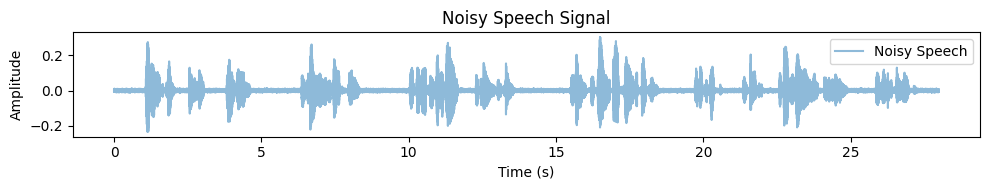

In [10]:
# visualize the noise
plt.figure(figsize=(10, 2))
plt.plot(np.linspace(0, duration, len(noisy_speech)), noisy_speech, label='Noisy Speech', alpha=0.5)
plt.title("Noisy Speech Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()


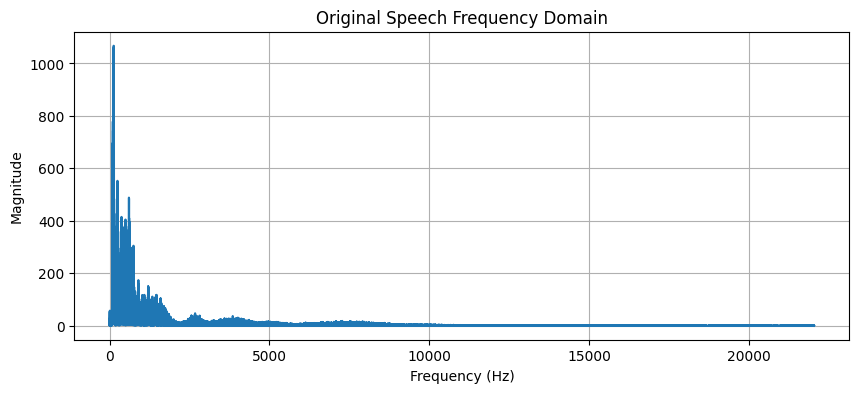

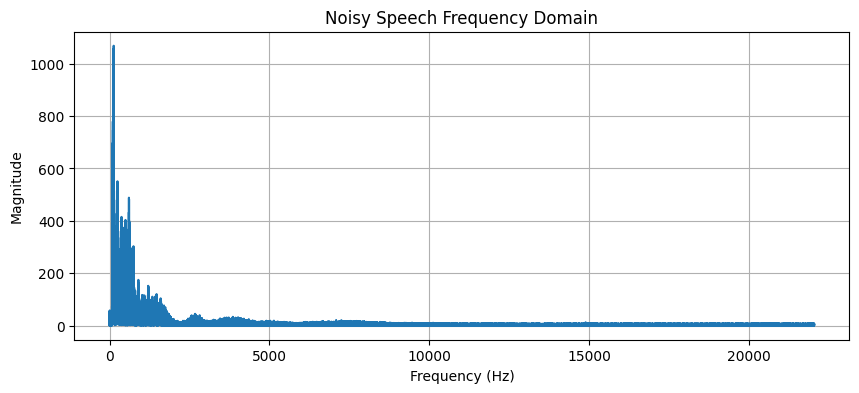

In [11]:
# compare the frequency domain of speech and noisy speech
def plot_frequency_domain(signal, sr, title):
    N = len(signal)
    yf = np.abs(fft(signal))
    xf = fftfreq(N, 1/sr)

    plt.figure(figsize=(10, 4))
    plt.plot(xf[:N//2], yf[:N//2])
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

plot_frequency_domain(speech, sr, "Original Speech Frequency Domain")
plot_frequency_domain(noisy_speech, sr, "Noisy Speech Frequency Domain")


In [12]:
from librosa import feature

# Spectral centroid (average “brightness” of spectrum)
centroid_original = feature.spectral_centroid(y=speech, sr=sr).mean()
centroid_noisy = feature.spectral_centroid(y=noisy_speech, sr=sr).mean()
print(f"Spectral Centroid: Original = {centroid_original:.2f} Hz, Noisy = {centroid_noisy:.2f} Hz")

# SNR
def compute_snr(clean, noisy):
    noise = noisy - clean
    return 10 * np.log10(np.sum(clean**2) / np.sum(noise**2))

snr_db = compute_snr(speech, noisy_speech)
print(f"Estimated SNR: {snr_db:.2f} dB")


Spectral Centroid: Original = 3996.67 Hz, Noisy = 8141.95 Hz
Estimated SNR: 20.00 dB


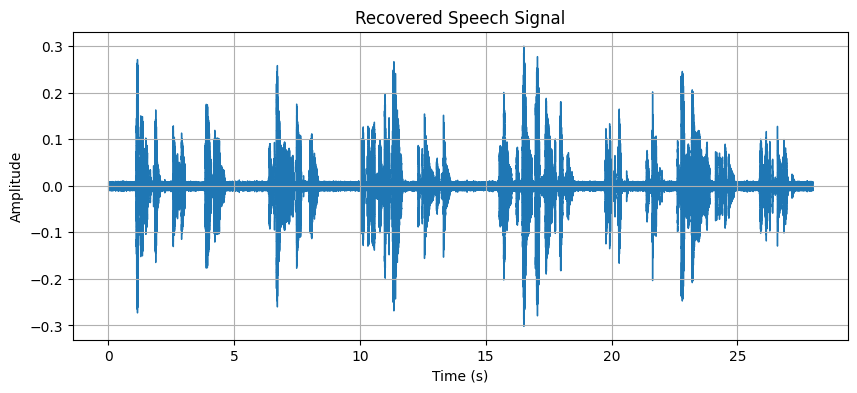

In [13]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Load signals
speech, sr = librosa.load("exam-1.wav", sr=None)


# FFT of noisy speech
N = len(noisy_speech)
Y = fft(noisy_speech)
# Estimate noise spectrum: simplest way, take first 0.1 sec as "noise-only"
noise_est = fft(noisy_speech[:int(0.1*sr)])
noise_mag = np.abs(noise_est)

# Spectral subtraction
Y_mag = np.abs(Y)
Y_phase = np.angle(Y)
Y_denoised_mag = np.maximum(Y_mag - np.mean(noise_mag), 0)  # subtract mean noise
Y_denoised = Y_denoised_mag * np.exp(1j * Y_phase)

# Inverse FFT
recovered_speech = np.real(ifft(Y_denoised))

# Plot recovered speech
plt.figure(figsize=(10, 4))
librosa.display.waveshow(recovered_speech, sr=sr)
plt.title("Recovered Speech Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


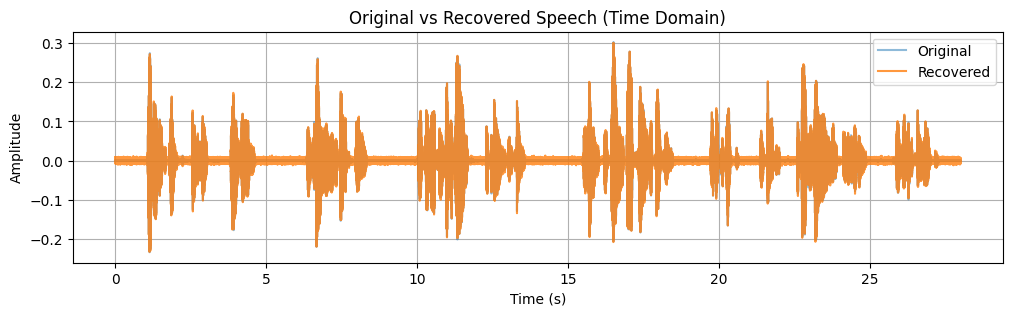

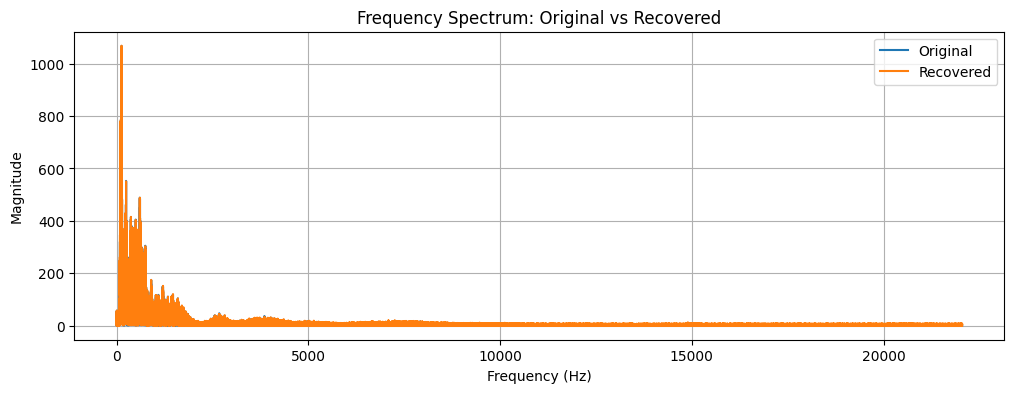

MSE: 7.0788e-06
MAE: 2.1233e-03
Estimated SNR between Original and Recovered: 20.30 dB


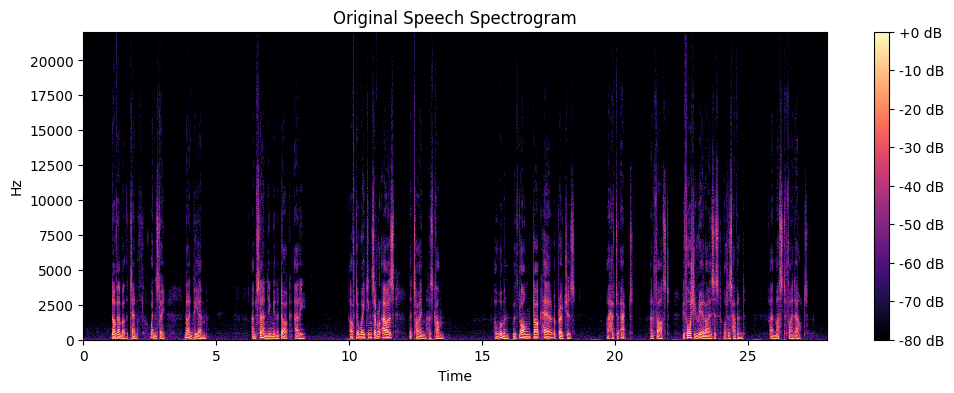

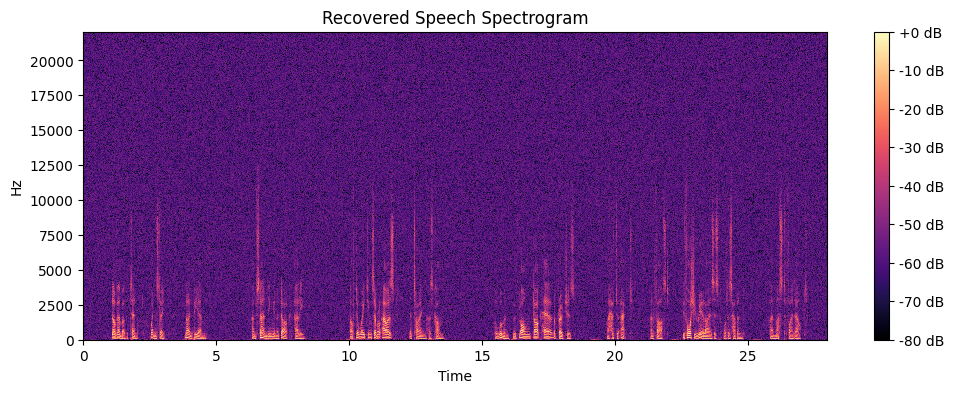

In [14]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.fft import fft

# Load original and noisy/recovered speech
speech, sr = librosa.load("exam-1.wav", sr=None)
# recovered_speech from your spectral subtraction code

# Ensure same length
min_len = min(len(speech), len(recovered_speech))
speech = speech[:min_len]
recovered_speech = recovered_speech[:min_len]

# -----------------------------
# 1️⃣ Time-domain comparison
# -----------------------------
t = np.linspace(0, min_len/sr, min_len)
plt.figure(figsize=(12, 3))
plt.plot(t, speech, label='Original', alpha=0.5)
plt.plot(t, recovered_speech, label='Recovered', alpha=0.8)
plt.title("Original vs Recovered Speech (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

# -----------------------------
# 2️⃣ Frequency-domain comparison
# -----------------------------
def plot_fft(sig, sr, label):
    N = len(sig)
    yf = np.abs(fft(sig))
    xf = np.fft.fftfreq(N, 1/sr)
    plt.plot(xf[:N//2], yf[:N//2], label=label)

plt.figure(figsize=(12, 4))
plot_fft(speech, sr, 'Original')
plot_fft(recovered_speech, sr, 'Recovered')
plt.title("Frequency Spectrum: Original vs Recovered")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()
plt.show()

# -----------------------------
# 3️⃣ Quantitative Metrics
# -----------------------------
# MSE
mse = np.mean((speech - recovered_speech)**2)
# MAE
mae = np.mean(np.abs(speech - recovered_speech))
# SNR
snr_db = 10 * np.log10(np.sum(speech**2) / np.sum((speech - recovered_speech)**2))

print(f"MSE: {mse:.4e}")
print(f"MAE: {mae:.4e}")
print(f"Estimated SNR between Original and Recovered: {snr_db:.2f} dB")

# -----------------------------
# 4️⃣ Optional: Spectrogram comparison
# -----------------------------
plt.figure(figsize=(12, 4))
D_orig = np.abs(librosa.stft(speech))
librosa.display.specshow(librosa.amplitude_to_db(D_orig, ref=np.max), sr=sr, y_axis='hz', x_axis='time')
plt.title("Original Speech Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.show()

plt.figure(figsize=(12, 4))
D_rec = np.abs(librosa.stft(recovered_speech))
librosa.display.specshow(librosa.amplitude_to_db(D_rec, ref=np.max), sr=sr, y_axis='hz', x_axis='time')
plt.title("Recovered Speech Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.show()


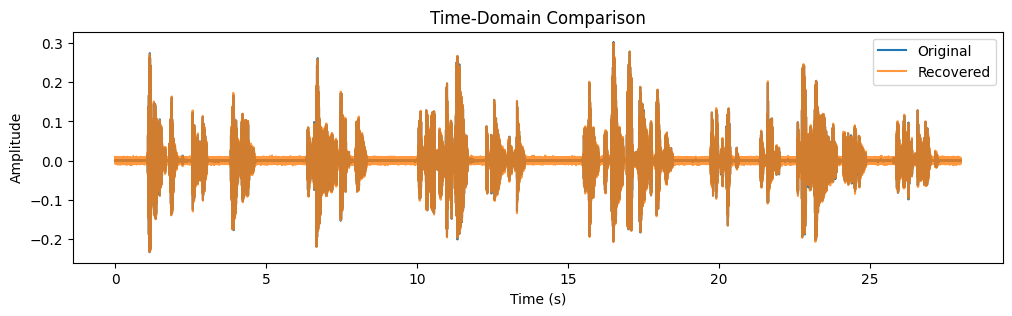

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,3))
plt.plot(t, speech, label='Original')
plt.plot(t, recovered_speech, label='Recovered', alpha=0.8)
plt.title("Time-Domain Comparison")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [16]:
# how frequency analysis can help isolate important audio features
print("Frequency analysis can help isolate important audio features by transforming the signal into the frequency domain, allowing us to identify and manipulate specific frequency components.")


Frequency analysis can help isolate important audio features by transforming the signal into the frequency domain, allowing us to identify and manipulate specific frequency components.


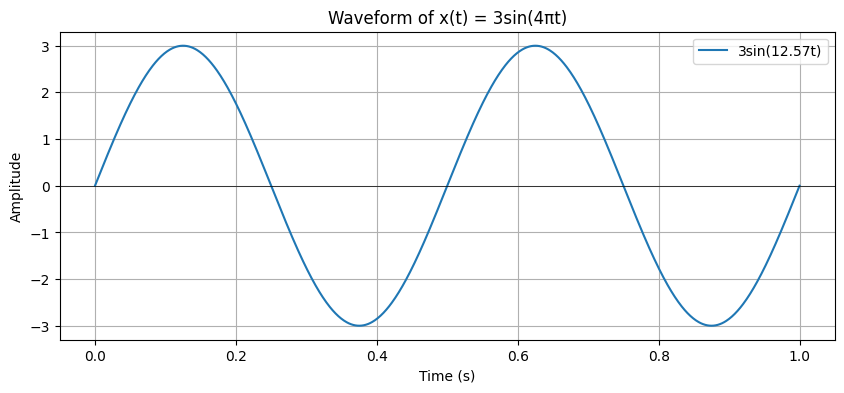

Amplitude: 3
Angular frequency: 12.566370614359172 rad/s
Frequency: 2.0 Hz
Time period: 0.5 s


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Signal parameters
A = 3
omega = 4 * np.pi  # angular frequency
f = omega / (2 * np.pi)  # frequency
T = 1 / f  # time period

# Time vector
t = np.linspace(0, 2*T, 1000)  # plot 2 periods

# Signal
x = A * np.sin(omega * t)

# Plot
plt.figure(figsize=(10,4))
plt.plot(t, x, label=f'{A}sin({omega:.2f}t)')
plt.title('Waveform of x(t) = 3sin(4πt)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

# Print info
print(f"Amplitude: {A}")
print(f"Angular frequency: {omega} rad/s")
print(f"Frequency: {f} Hz")
print(f"Time period: {T} s")
